In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# import iDEA
# import pickle
# import time
# from pathlib import Path

# # Initialize the system
# points = 231
# l = 10
# x = np.linspace(-l, l, points)
# dx = x[1] - x[0]
# omega = 0.3275
# v_ext = 0.5 * omega**2 * (x**2)
# v_int = np.zeros([len(x), len(x)])
# qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
# qho_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import pickle
import time
from pathlib import Path
import collections_iDEA
import collections_iDEA.multiplets as mm
import sys

states_small_int = {}
states_zero_int = {}
occupied_info = []

directory = Path("states")

# for i in range(0, 51):
#     file_path = directory / f"qho_small_int_state_{i}_1e-11.pkl"
#     try:
#         with file_path.open("rb") as file:
#             states_small_int[i] = pickle.load(file)
#     except FileNotFoundError:
#         print(f"File state_{i}.pkl not found.")
#     except Exception as e:
#         print(f"An error occurred while loading state_{i}.pkl: {e}")

# for i in range(0, 51):
#     file_path = directory / f"qho_zero_int_state_{i}.pkl"
#     try:
#         with file_path.open("rb") as file:
#             states_zero_int[i] = pickle.load(file)
#     except FileNotFoundError:
#         print(f"File state_{i}.pkl not found.")
#     except Exception as e:
#         print(f"An error occurred while loading state_{i}.pkl: {e}")

# file_path = "occupied_info_231.pkl"
# with open(file_path, "rb") as file:
#     occupied_info = pickle.load(file)



print(sys.path)

['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/imjudgement7497/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/iDEA_latest-1.0.2-py3.10.egg', '/home/imjudgement7497/collections_iDEA_package', '/usr/lib/python3/dist-packages']


In [12]:
# energies_single = []
# for key, value in states_single.items():
#     energies_single.append(value.energy)

# energies_double = []
# for key, value in states_double.items():
#     energies_double.append(value.energy)

# analytic_energies = []
# for i in range(len(energies_single)):
#     energy = omega*(i + 0.5)
#     analytic_energies.append(energy)


In [13]:
with open("qho_energies_small_int_0_199.pkl", "rb") as file:
    energies_small_int_1 = pickle.load(file)

with open("qho_energies_small_int_116_199.pkl", "rb") as file:
    energies_small_int_2 = pickle.load(file)

# with open("qho_energies_non_int_0_199.pkl", "rb") as file:
#     energies_non_int = pickle.load(file)

with open("qho_energies_zero_int_0_199.pkl", "rb") as file:
    energies_zero_int_1 = pickle.load(file)

with open("qho_energies_zero_int_116_199.pkl", "rb") as file:
    energies_zero_int_2 = pickle.load(file)

energies_small_int = energies_small_int_1 + energies_small_int_2
energies_zero_int = energies_zero_int_1 + energies_zero_int_2
print(len(energies_zero_int), len(energies_small_int))

166 166


In [14]:

# Initialize the system
points = 231
l = 10
x = np.linspace(-l, l, points)
dx = x[1] - x[0]
omega = 0.3275
v_ext = 0.5 * omega**2 * (x**2)
v_int = np.zeros([len(x), len(x)])
qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
qho_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")

def qho_energy(index):
    return omega * (index + 0.5)

analytic = mm.apply_energy_method(qho_energy, qho_double, 200)
analytic.calculate_multiplets()



File indices_up_to_20.pkl exists
Elapsed Time = 0.032112713999595144


In [15]:
for elm in analytic.multiplets:
    print(elm)

print(analytic.get_num_of_multiplets())
print(analytic.get_deg_of_multiplets())

[1, 2]
[3, 4, 5]
[6, 7, 8, 9]
[10, 11, 12, 13, 14]
[15, 16, 17, 18, 19, 20]
[21, 22, 23, 24, 25, 26, 27]
[28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44]
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
[91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]
[153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
[171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
18
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Do list 1 and list 2 energies match up: True
From List 1: Multiplet: [1, 2], Energy: 0.6550000000054604
From List 2: Multiplet: [1, 2], Energy: 0.6550000000004403
--
From List 1: Multiplet: [3, 4, 5], Energy: 0.9825000000180119
From List 2: Multiplet: [3, 4, 5], Energy: 0.982500000015056
--
From List 1: Multiplet: [6, 7, 8, 9], Energy: 1.310000000020095
From List 2: Multiplet: [6, 7, 8, 9], Energy: 1.310000000015685
--
From List 1: Multiplet: [10, 11, 12, 13, 14], Energy: 1.637500000307344
From List 2: Multiplet: [10, 11, 12, 13, 14], Energy: 1.6375000003043811
--
From List 1: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.9650000003232755
From List 2: Multiplet: [15, 16, 17, 18, 19, 20], Energy: 1.9650000003193004
--
From List 1: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.292500004436721
From List 2: Multiplet: [21, 22, 23, 24, 25, 26, 27], Energy: 2.2925000044342245
--
From List 1: Multiplet: [28, 29, 30, 31, 32, 33, 34, 35], Energy: 2.62000000472728
From List 2: Multiplet: [

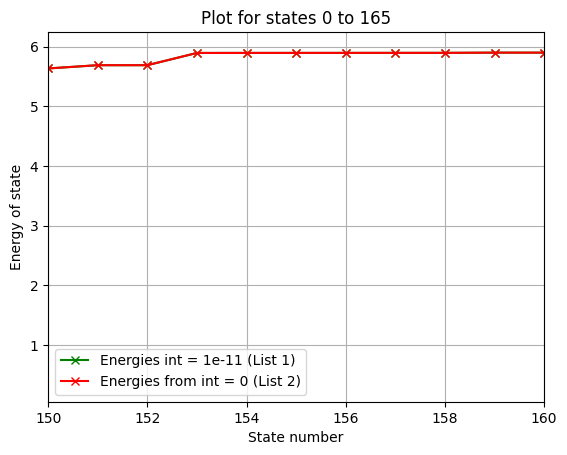

In [21]:
legend = ["Energies int = 1e-11 (List 1)", "Energies from int = 0 (List 2)"]
collections_iDEA.analysis.run_energy_comparison(analytic, energies_small_int, energies_zero_int, legend, tol=1e-2, zoom=[150, 160])

In [17]:
for i, elm in enumerate(energies_small_int):
    print(f"State {i}, energy = {elm}")

State 0, energy = 0.3275000000050162
State 1, energy = 0.65500000000333
State 2, energy = 0.6550000000054604
State 3, energy = 0.9825000000047854
State 4, energy = 0.9825000000180119
State 5, energy = 0.982500000019164
State 6, energy = 1.3100000000180325
State 7, energy = 1.310000000020095
State 8, energy = 1.3100000003070105
State 9, energy = 1.310000000307505
State 10, energy = 1.6375000000337134
State 11, energy = 1.637500000307344
State 12, energy = 1.637500000308409
State 13, energy = 1.6375000044217116
State 14, energy = 1.6375000044222372
State 15, energy = 1.965000000321521
State 16, energy = 1.9650000003232755
State 17, energy = 1.9650000044220506
State 18, energy = 1.965000004422921
State 19, energy = 1.9650000494203836
State 20, energy = 1.96500004942088
State 21, energy = 2.2925000006115184
State 22, energy = 2.292500004436721
State 23, energy = 2.29250000443774
State 24, energy = 2.2925000494209904
State 25, energy = 2.2925000494214194
State 26, energy = 2.292500441935661